# Chapter 1
## Introduction


    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Blackboard before the deadline (see Blackboard).
    
Learning goals:
1. Brush up basics of vectors and matrices
2. Get familiar with python
3. Get familiar with activation functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

For exercises 1-6 you do not need to write any Python code, but you might find calculating the exercises with Python useful for practice. 

For exercises 7-10 (and for all future assignments), make sure that your plots are shown *in* the notebook when we open it; which you can achieve by saving the notebook when all plots are open and sending in this version. 

As mentioned in the course reader, in every assignment we will check whether your notebook code runs through without errors with the Cell->Run All command. You risk not receiving any points if this fails. We will not debug your code. Be sure to restart the notebook kernel from time to time (Kernel->Restart) and before submitting to notice it if you use old variable or function names that are still defined in the notebook kernel, but not anymore in the code. 

A useful reference for linear algebra is [**The Matrix Cookbook**](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=3274). A good overview for partial derivatives is [Khan Academy: Partial Derivatives](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives-and-the-gradient/a/introduction-to-partial-derivatives).

### Exercise 1: Vector operations (1 point)
Let's look at vectors. Work out this assignment by hand and write down your solution in markdown with LaTeX.

Let $\mathbf{x} = (1,2)^T$ and $\mathbf{y} = (-1,1)^T$

1. How much is $10\mathbf{x}$?
1. What is the length (norm) of the vector $\mathbf{x}$? Briefly show how to calculate the solution. 
1. How much is $\mathbf{x}^T\mathbf{y}$?
1. What is the angle between $\mathbf{x}$ and $\mathbf{y}$ in degrees? Briefly show how to calculate the solution. 


In [2]:
x = np.array((1,2)).T
y = np.array((-1,1)).T

print np.dot(x.T,y)

1


### Solution 1
$10\mathbf{x} = 
\left(
\begin{array}{cc}
10 \\
20
\end{array}
\right)
$.
1. $||x|| = \sqrt{1^2 + 2^2} = \sqrt{5}$
1. $\mathbf{x}^T\mathbf{y} = (1,2) * \left(
\begin{array}{cc}
-1 \\
1
\end{array}
\right) = 1*(-1) + 2*1 = 1$
1. $ cos(\alpha) = \frac{x*y}{||x||*||y||} = \frac {\sqrt10}{10} \approx 0.3162  \\ \alpha\approx  71.5\circ$

### Exercise 2: Vectors and matrices (1 point)
Let's look at vectors and matrices. Work out this assignment by hand and write down your solution in markdown using LaTeX. 

Let $\mathbf{x} = (1,2)^T$ and $\mathbf{A} = 
\left(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right)
$.

1. Can we compute $\mathbf{x}\mathbf{A}$? Why can, or why can't we?
1. How much is $\mathbf{A}\mathbf{x}$?

### Solution 2
1. No. x is a 2x1 matrix, while A is a 2x2 matrix. The amount of columns in x must match the amount of rows in A. In terms of linear transformations, A is mapping from 2D space to 2D space (there are 2 input vectors and 2 output vectors with 2 coordinates). However, x is mapping from 1d space to 2d space. x expects 1D input, while A outputs 2D. This is why the transformations cannot be chained this way. The other way works however, as this only represents going from 1D -> 2D -> 2D. Interestingly enough, numpy interprets x = x.T, and thus gives an erroneous output.


    
1. $ \mathbf Ax=
\left(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right)
\left(
\begin{array}{cc}
1\\
2
\end{array}
\right) = \left(
\begin{array}{cc}
1 * 1 + 2 * 2\\
3*1 + 4*2
\end{array}
\right) = \left(
\begin{array}{cc}
5\\
11
\end{array}
\right)$

In [3]:
A = np.arange(4).reshape(2,2)+1
print np.dot(x,A), np.dot(A,x), x, x.T

[ 7 10] [ 5 11] [1 2] [1 2]


### Exercise 3: Matrices (1 point)
Let's look at matrices. Work out this assignment by hand and write down your solution in markdown with LaTeX equations. 

Let $\mathbf{A} = 
\left(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right)
$ and $\mathbf{B} = 
\left(
\begin{array}{cc}
5 & 6 \\
7 & 8
\end{array}
\right)
$.

1. How much is $AB$?
1. How much is $BA$?

### Solution 3
1.  $AB = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right)\left(
\begin{array}{cc}
5 & 6 \\
7 & 8
\end{array}
\right) = \left(
\begin{array}{cc}
1*5 + 2*7& 1*6 + 2*8  \\
3*5 + 4*7 & 3*6 + 4*8
\end{array}
\right) = \left(
\begin{array}{cc}
19 & 22 \\
43 & 50
\end{array}
\right)$


1. $ BA =\left(
\begin{array}{cc}
5 & 6 \\
7 & 8
\end{array}
\right)\left(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right) = \left(
\begin{array}{cc}
5*1 + 6*3& 5*2 + 6*4  \\
7*1 + 8*3 & 7*2 + 8*4
\end{array}
\right) = \left(
\begin{array}{cc}
23 & 34 \\
31 & 46
\end{array}
\right)$

In [4]:
B = A+4
print np.dot(A,B), '\n', np.dot(B,A)

[[19 22]
 [43 50]] 
[[23 34]
 [31 46]]


### Exercise 4: Partial derivatives (1 point)

Let's brush up on partial derivatives. 

Let $\mathbf{x} = (x_1,\ldots,x_i,\ldots,x_n)^T$ (a vector) and $f(\mathbf{x}) = \mathbf{x}^T\mathbf{x}$. Write down the expression for the partial derivative $\frac{\partial f}{\partial x_i}$. Briefly explain how you arrived at the result. 

Hint: How would the function $f(\mathbf{x})$ look like if it was written with the vector scalars $x_i$ instead of the vector $\mathbf{x}$?

### Solution 4
$f(\mathbf{x}) = \mathbf{x}^T\mathbf{x} = \sum_{k=1}^{n} x^2_{k} \\
\frac{\partial f}{\partial x_i} = \frac{\partial}{\partial x_i}\sum_{k=1}^{n} x^2_{k} = 2x_i $

In the partial derivative, all Xk, except for Xk=i, are treated as constants. Added constants' derivatives are 0, so the derivative of Xi² is all that is left.

### Exercise 5: Gradients (1 point)
Often, we need to compute the gradient of a particular function. Given a function $f(x_1,\ldots,x_n)$, the gradient is just a collection of partial derivatives:
\begin{equation*}
\nabla f = \left(\frac{\partial f}{\partial x_1}, \ldots,\frac{\partial f}{\partial x_n}\right) \,.
\end{equation*}

Let $f(x,y) = - (\cos^2 x + \cos^2 y)^2$. 

Derive the gradient $\nabla f = \left(\frac{\partial f}{\partial x},\frac{\partial f}{\partial y}\right)$.

### Solution 5
$ (\frac{\partial f}{\partial x}{(- (\cos^2 x + \cos^2 y)^2)} =\frac{d}{dx}(-\cos ^4(x)-2\cos ^2(x)\cos ^2(y)-\cos ^4(y)) = -\frac{d}{dx}(\cos ^4(x))-\frac{d}{dx}(2\cos ^2(x)\cos ^2(y))-\frac{d}{dx}(\cos ^4(y)) = -(-4\cos ^3(x)\sin(x))-(-2\cos ^2(y)\sin (2x))-0 = 4\cos ^3(x)\sin (x)+2\sin (2x)\cos ^2(y)$

 $(\frac{\partial f}{\partial y}{(- (\cos^2 x + \cos^2 y)^2)} = \frac{d}{dy}(-\cos ^4(x)-2\cos ^2(x)\cos ^2(y)-\cos ^4(y))  =-\frac{d}{dy}(\cos ^4(x))-\frac{d}{dy}(2\cos ^2(x)\cos ^2(y))-\frac{d}{dy}(\cos ^4(y)) 
 = -0-(-2\cos ^2(x)\sin(2y))-(-4\cos ^3(y)\sin (y)) = 4\cos ^3(y)\sin (y)+2\cos ^2(x)\sin (2y)$



### Exercise 6: Linear activation function (1 point)
Write a function that computes the *linear activation function* (trivial identity) for any given input, and plot it over the input range  $x \in [-10,10]$. Don't forget to add sensible labels to the axes. 

### Solution 6

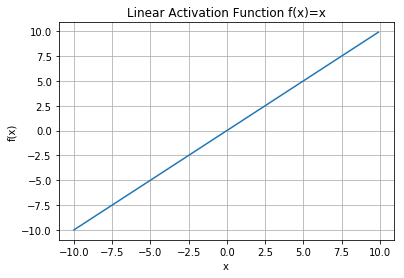

In [5]:
# Linear activation function: 

def f(x):
    return x    # trivial identity

# Plot activation over given range:

x = np.arange(-10, 10, 0.1)

plt.figure()
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Linear Activation Function f(x)=x")
plt.grid(True)

### Exercise 7: Linear threshold activation function (1 point)
Write a function that computes the *linear threshold activation function* (also known as step activation function) for any given input, and plot it over the input range $x \in [-10,10]$. Don't forget to add sensible labels to the axes. 

### Solution 7

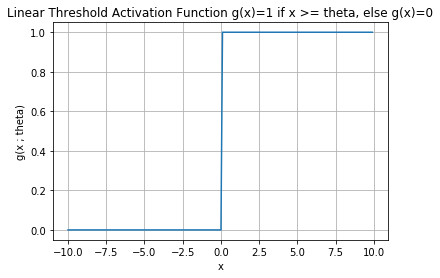

In [6]:
# Linear threshold activation function: 

def g(x):
    y = []    # list to store outputs
    theta = 0 # this is the threshold. I initialize it at 0 for the sake of plotting
    for i in x:      
        if i >= theta:
            y.append(1)
        else: y.append(0)
    return y        

# Plot activation over given range: 

plt.figure()
plt.plot(x,g(x))
plt.xlabel("x")
plt.ylabel("g(x ; theta)")
plt.title("Linear Threshold Activation Function g(x)=1 if x >= theta, else g(x)=0")
plt.grid(True)


### Exercise 8: Sigmoid activation function (1 point)
Write a function that computes the *sigmoid activation function* for any given input, and plot it over the input range $x \in [-10,10]$. Don't forget to add sensible labels to the axes. 

### Solution 8

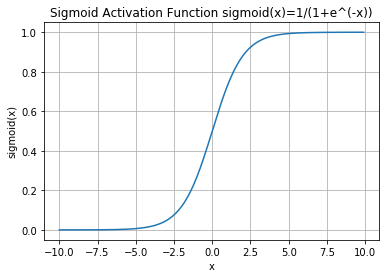

In [7]:
# Linear sigmoid activation function: 
import math


def sigmoid(x):
    y = []
    for i in x:
        y.append(1/(1+math.exp(-i)))
    return y    

# Plot activation over given range: 

plt.figure()
plt.plot(x,sigmoid(x))
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Activation Function sigmoid(x)=1/(1+e^(-x))")
plt.grid(True)


### Exercise 9: Inner products (1 point)

**1.** The input of the activation function in a simple perceptron (or any regular neural network neuron) is calculated as a weighted sum between each input value $x_i$ and each corresponding weight $w_i$, that is: $\sum_{i=1}^m w_i x_i $.

Calculate the input of the activation function for the given input values ```x_inputs``` and weight values ```weights``` **in a for-loop**. 

### Solution 9.1

In [8]:
x_inputs = np.array([4.0,2.0,3.0])
weights  = np.array([0.7,0.3,0.2])

print "Shape of inputs: ", x_inputs.shape
print "Shape of weights: ", weights.shape

activation_input = 0.0

# Write a for-loop

for i in range(x_inputs.size):
    activation_input += x_inputs[i]*weights[i]

print "The input of the activation function is:", activation_input

Shape of inputs:  (3,)
Shape of weights:  (3,)
The input of the activation function is: 4.0


**2.** For-loops tend to be slow. There is a direct mathematical operation that expresses the same as our weighted sum above. This operation is also efficiently implemented as a ```numpy``` function. 

How is the operation called? Use the corresponding ```numpy``` function to calculate ```activation_input``` in one line without a for-loop.

Hint: $\sum_{i=1}^m w_i x_i = \mathbf{w}^\top \mathbf{x}$ 

It is called dot product. 

### Solution 9.2

In [9]:
x_inputs = np.array([4.0,2.0,3.0])
weights  = np.array([0.7,0.3,0.2])

print "Shape of inputs: ", x_inputs.shape
print "Shape of weights: ", weights.shape

# Write a one-liner

activation_input = np.dot(x_inputs,weights)

print "The input of the activation function is:", activation_input

Shape of inputs:  (3,)
Shape of weights:  (3,)
The input of the activation function is: 4.0


### Exercise 10: Inner products (1 point)

**1.** When implementing a full neural network we will have multiple $h_n$ hidden units (think $h_n$ individual perceptrons). In a multi-layer perceptron (a simple fully connected neural network), every hidden unit $h_i$ is connected to all of the $m$ input units, leading to $m \times h_n$ weights in total. Again, first implement this in a for-loop. In the example below `weights` represents the weights for 4 hidden units. 

### Solution 10.1

In [10]:
x_inputs = np.array([4.0,2.0,3.0])
weights  = np.array([[0.7,0.3,0.2], 
                     [-0.23,0.42,-0.1], 
                     [-1.5,-2.3,0.4], 
                     [0.83,-0.12,-0.7]])

print "Shape of inputs: ", x_inputs.shape
print "Shape of weights: ", weights.shape

activation_inputs = np.zeros([weights.shape[0],])

# Write a for-loop

for k in range(weights.shape[0]):
    for i in range(x_inputs.size):
        activation_inputs[k] += x_inputs[i]*weights[k][i]


print "The inputs of the activation functions for the hidden units are:", activation_inputs

Shape of inputs:  (3,)
Shape of weights:  (4, 3)
The inputs of the activation functions for the hidden units are: [ 4.   -0.38 -9.4   0.98]


**2.** Now implement the same with the operation you found before.

### Solution 10.2

In [11]:
x_inputs = np.array([4.0,2.0,3.0])
weights  = np.array([[0.7,0.3,0.2], 
                     [-0.23,0.42,-0.1], 
                     [-1.5,-2.3,0.4], 
                     [0.83,-0.12,-0.7]])

print "Shape of inputs: ", x_inputs.shape
print "Shape of weights: ", weights.shape

activation_inputs = np.zeros([weights.shape[0],])

# Write a one-liner

activation_inputs += np.dot(x_inputs,weights.T)

print "The inputs of the activation functions for the hidden units are:", activation_inputs

Shape of inputs:  (3,)
Shape of weights:  (4, 3)
The inputs of the activation functions for the hidden units are: [ 4.   -0.38 -9.4   0.98]


**3.** Usually you would process multiple examples at once (*in a batch*), generating a unit activation individually for every example. `x_inputs` now carries two examples. Now - using only the one-line operation you found before - again gather the activations. 

### Solution 10.3

In [12]:
x_inputs = np.array([[4.0,2.0,3.0], 
                     [3.0,0.5,4.0]])

weights  = np.array([[0.7,0.3,0.2], 
                     [-0.23,0.42,-0.1], 
                     [-1.5,-2.3,0.4], 
                     [0.83,-0.12,-0.7]])

print "Shape of inputs: ", x_inputs.shape
print "Shape of weights: ", weights.shape

activation_inputs = np.zeros([weights.shape[0], 2])

# Write a one-liner

activation_inputs += np.dot(x_inputs,weights.T).T

print "The 2 sets of inputs of the activation functions for the hidden units are:"
print activation_inputs

Shape of inputs:  (2, 3)
Shape of weights:  (4, 3)
The 2 sets of inputs of the activation functions for the hidden units are:
[[ 4.    3.05]
 [-0.38 -0.88]
 [-9.4  -4.05]
 [ 0.98 -0.37]]
